# Guide to Keras

For a more complete breakdown of the theory behind the code, check out The Absolute Guide to Keras on the Paperspace blog.

In [ ]:
## Install dependencies
# !pip install tensorflow
# !pip install keras
# !pip install pydot
# !apt-get update
# !apt install graphviz

### Sequential Models

In [8]:
from tensorflow.keras.layers import Convolution2D, Flatten, Dense 
from tensorflow.keras.layers import Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Convolution2D(512, kernel_size=(3,3), activation='relu', padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 512)       5120      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 512)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1003530   
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
Total params: 1,008,650
Trainable params: 1,008,650
Non-trainable params: 0
_________________________________________________________________


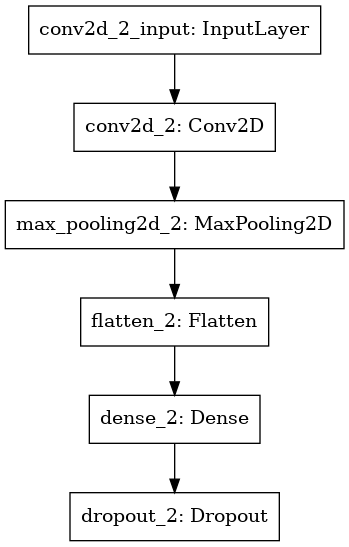

In [11]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [12]:
from tensorflow.keras.layers import Convolution2D, Flatten, Dense
from tensorflow.keras.layers import Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

model1 = Sequential([
    Convolution2D(512, kernel_size=(3,3), activation='relu', padding="same", input_shape=(28, 28, 1)),
    MaxPooling2D((2,2), strides=(2,2)),
    Flatten(),
    Dense(10, activation='relu'),
    Dropout(0.5)
])

In [13]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 512)       5120      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 512)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1003530   
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
Total params: 1,008,650
Trainable params: 1,008,650
Non-trainable params: 0
_________________________________________________________________


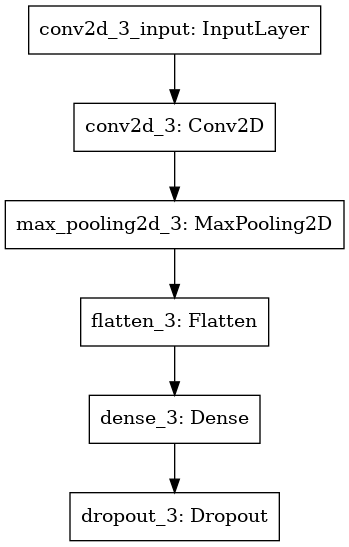

In [14]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model1, to_file='model1.png', show_layer_names=True)

### Functional API

In [15]:
from tensorflow.keras.layers import Convolution2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input, MaxPooling2D
from tensorflow.keras.models import Model


input1 = Input(shape = (28,28,1))
Conv1 = Convolution2D(512, kernel_size=(3,3), activation='relu', padding="same")(input1)
Maxpool1 = MaxPooling2D((2,2), strides=(2,2))(Conv1)
Flatten1 = Flatten()(Maxpool1)
Dense1 = Dense(10, activation='relu')(Flatten1)
Dropout1 = Dropout(0.5)(Dense1)

model = Model(input1, Dropout1)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 512)       5120      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 512)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1003530   
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
Total params: 1,008,650
Trainable params: 1,008,650
Non-trainable params: 0
___________________________________________________

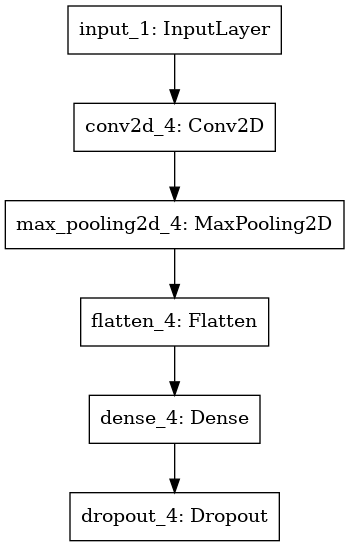

In [17]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model2.png', show_layer_names=True)

### Custom Models

In [18]:
import tensorflow as tf

class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self, inp_vocab_size, embedding_size, lstm_size, input_length):
        super(Encoder, self).__init__()
        
        #Initialize Embedding layer
        #Intialize Encoder LSTM layer
        
        self.lstm_size = lstm_size
        self.embedding = tf.keras.layers.Embedding(inp_vocab_size, embedding_size)
        self.lstm = tf.keras.layers.LSTM(lstm_size, return_sequences=True, return_state=True)

    def call(self, input_sequence, states):
        
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- All encoder_outputs, last time steps hidden and cell state
        '''
        
        embed = self.embedding(input_sequence)
        output, state_h, state_c = self.lstm(embed, initial_state=states)

        return output, state_h, state_c
    
    def initialize_states(self,batch_size):
        
        '''
        Given a batch size it will return intial hidden state and intial cell state.
        If batch size is 32- Hidden state shape is [32,lstm_units], cell state shape is [32,lstm_units]
        '''
    
        return (tf.zeros([batch_size, self.lstm_size]),
                tf.zeros([batch_size, self.lstm_size]))

### Callbacks

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2)

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("checkpoint1.h5", monitor='accuracy', verbose=1,
                              save_best_only=True, mode='auto')

In [21]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce = ReduceLROnPlateau(monitor='accuracy', factor=0.2, patience=10, 
                           min_lr=0.0001, verbose = 1)

In [22]:
from tensorflow.keras.callbacks import TensorBoard

logdir='logs'
tensorboard_Visualization = TensorBoard(log_dir=logdir)